In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten, Dense, Embedding
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import models, layers, optimizers
from sklearn.preprocessing import LabelEncoder

In [2]:
max_features = 10000
maxlen = 500

# Carregar os dados do arquivo CSV
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Obter os textos das colunas relevantes
x_train_text = train_data['LyricsClean']
y_train = train_data['sentiment']
x_test_text = test_data['LyricsClean']
y_test = test_data['sentiment']

# Tokenização dos textos
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train_text)

x_train = tokenizer.texts_to_sequences(x_train_text)
x_test = tokenizer.texts_to_sequences(x_test_text)

# Padding das sequências
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Crie uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Aplique a codificação aos rótulos de destino
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)


print(x_train.shape)
print(y_train_encoded.shape)

print(x_test.shape)
print(y_test_encoded.shape)

print(x_train[0])
print(y_train_encoded[0])

(726, 500)
(726,)
(182, 500)
(182,)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0 

# Hiden=1, epoch=9, batch_size=32, softmax

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 500, 8)            80000     
                                                                 
 flatten_6 (Flatten)         (None, 4000)              0         
                                                                 
 dense_54 (Dense)            (None, 3)                 12003     
                                                                 
Total params: 92,003
Trainable params: 92,003
Non-trainable params: 0
_________________________________________________________________
Epoch 1/13
19/19 [==============================] - 0s 7ms/step - loss: 0.9178 - sparse_categorical_accuracy: 0.5741 - val_loss: 0.8392 - val_sparse_categorical_accuracy: 0.6370
Epoch 2/13
19/19 [==============================] - 0s 2ms/step - loss: 0.8426 - sparse_categorical_accuracy: 0.6328 - val_loss: 0.8121

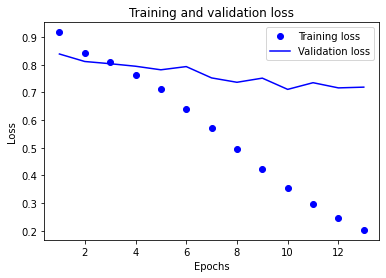

In [37]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=[SparseCategoricalAccuracy()])  # Métrica alterada

model.summary()

history = model.fit(x_train, y_train_encoded, epochs=13, batch_size=32, validation_split=0.2)

# Avaliar o modelo
results = model.evaluate(x_test, y_test_encoded, verbose = 0)
print(results)

# Plotar a curva de aprendizado
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

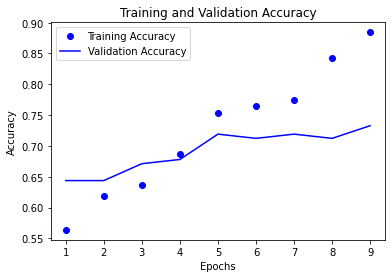

In [4]:
acc_values = history.history['sparse_categorical_accuracy']
val_acc_values = history.history['val_sparse_categorical_accuracy']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [6]:
preds = model.predict(x_test) # probabilities
class_preds = preds > 0.5

print(preds[0:5])
class_preds[0:5]

6/6 [==============================] - 0s 821us/step
[[0.04740324 0.03930581 0.913291  ]
 [0.18636928 0.06795465 0.74567604]
 [0.13814105 0.0897048  0.7721541 ]
 [0.15628994 0.10913949 0.7345706 ]
 [0.18358108 0.07212105 0.7442979 ]]


array([[False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True]])

# Hiden=3, epoch=9, batch_size=32, softmax, relu

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 3)                 1503      
                                                                 
 dense_69 (Dense)            (None, 3)                 12        
                                                                 
 dense_70 (Dense)            (None, 3)                 12        
                                                                 
Total params: 1,527
Trainable params: 1,527
Non-trainable params: 0
_________________________________________________________________
Epoch 1/9
37/37 [==============================] - 0s 3ms/step - loss: 28.3921 - sparse_categorical_accuracy: 0.5241 - val_loss: 5.6279 - val_sparse_categorical_accuracy: 0.5959
Epoch 2/9
37/37 [==============================] - 0s 1ms/step - loss: 2.8556 - sparse_categorical_accuracy: 0.5845 - val_loss: 1.3816 - 

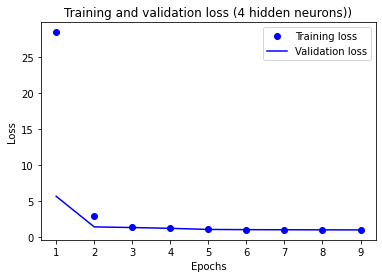

In [43]:
hidden = 3

model2 = Sequential()
model2.add(layers.Dense(hidden, activation='relu', input_shape=(500,)))
model2.add(layers.Dense(hidden, activation='relu'))
model2.add(layers.Dense(3, activation='softmax'))

model2.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=[SparseCategoricalAccuracy()])

model2.summary()

history2 = model2.fit(x_train, y_train_encoded, epochs=9, batch_size=16, validation_split=0.2)


# Avaliar o modelo
results2 = model2.evaluate(x_test, y_test_encoded, verbose = 0)
print(results2)

# Plotar a curva de aprendizado
loss_values2 = history2.history['loss']
val_loss_values2 = history2.history['val_loss']
epochs2 = range(1, len(loss_values2) + 1)

plt.plot(epochs2, loss_values2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss_values2, 'b', label='Validation loss')
plt.title('Training and validation loss (4 hidden neurons))')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Hiden=4

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 4)                 2004      
                                                                 
 dense_46 (Dense)            (None, 4)                 20        
                                                                 
 dense_47 (Dense)            (None, 3)                 15        
                                                                 
Total params: 2,039
Trainable params: 2,039
Non-trainable params: 0
_________________________________________________________________
Epoch 1/9
19/19 [==============================] - 0s 6ms/step - loss: 41.7011 - sparse_categorical_accuracy: 0.5207 - val_loss: 20.1774 - val_sparse_categorical_accuracy: 0.4247
Epoch 2/9
19/19 [==============================] - 0s 2ms/step - loss: 10.6508 - sparse_categorical_accuracy: 0.4638 - val_loss: 11.5650

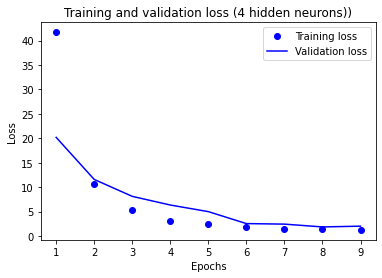

In [32]:
hidden = 4

model4 = Sequential()
model4.add(layers.Dense(hidden, activation='relu', input_shape=(500,)))
model4.add(layers.Dense(hidden, activation='relu'))
model4.add(layers.Dense(3, activation='softmax'))

model4.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=[SparseCategoricalAccuracy()])

model4.summary()

history4 = model4.fit(x_train, y_train_encoded, epochs=9, batch_size=32, validation_split=0.2)


# Avaliar o modelo
results4 = model4.evaluate(x_test, y_test_encoded, verbose = 0)
print(results4)


# Plotar a curva de aprendizado
loss_values4 = history4.history['loss']
val_loss_values4 = history4.history['val_loss']
epochs4 = range(1, len(loss_values4) + 1)

plt.plot(epochs4, loss_values4, 'bo', label='Training loss')
plt.plot(epochs4, val_loss_values4, 'b', label='Validation loss')
plt.title('Training and validation loss (4 hidden neurons))')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Hiden = 10

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 10)                5010      
                                                                 
 dense_40 (Dense)            (None, 10)                110       
                                                                 
 dense_41 (Dense)            (None, 3)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/9
19/19 [==============================] - 1s 20ms/step - loss: 226.6769 - sparse_categorical_accuracy: 0.4931 - val_loss: 137.4543 - val_sparse_categorical_accuracy: 0.4795
Epoch 2/9
19/19 [==============================] - 0s 2ms/step - loss: 86.4567 - sparse_categorical_accuracy: 0.5224 - val_loss: 76.4

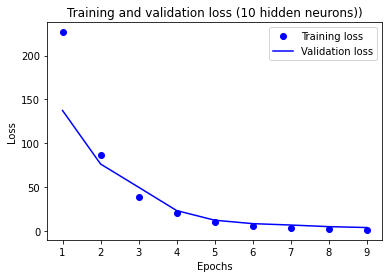

In [30]:
hidden = 10

model10 = Sequential()
model10.add(layers.Dense(hidden, activation='relu', input_shape=(500,)))
model10.add(layers.Dense(hidden, activation='relu'))
model10.add(layers.Dense(3, activation='softmax'))

model10.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=[SparseCategoricalAccuracy()])

model10.summary()

history10 = model10.fit(x_train, y_train_encoded, epochs=9, batch_size=32, validation_split=0.2)

# Avaliar o modelo
results10 = model10.evaluate(x_test, y_test_encoded, verbose = 0)
print(results10)


# Plotar a curva de aprendizado
loss_values10 = history10.history['loss']
val_loss_values10 = history10.history['val_loss']
epochs10 = range(1, len(loss_values10) + 1)

plt.plot(epochs10, loss_values10, 'bo', label='Training loss')
plt.plot(epochs10, val_loss_values10, 'b', label='Validation loss')
plt.title('Training and validation loss (10 hidden neurons))')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# L2 regularization

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 3)                 1503      
                                                                 
 dense_133 (Dense)           (None, 3)                 12        
                                                                 
 dense_134 (Dense)           (None, 3)                 12        
                                                                 
Total params: 1,527
Trainable params: 1,527
Non-trainable params: 0
_________________________________________________________________
Epoch 1/9
19/19 [==============================] - 1s 26ms/step - loss: 29.5364 - sparse_categorical_accuracy: 0.5603 - val_loss: 28.6482 - val_sparse_categorical_accuracy: 0.5753
Epoch 2/9
19/19 [==============================] - 0s 3ms/step - loss: 4.0355 - sparse_categorical_accuracy: 0.5879 - val_loss: 18.6953

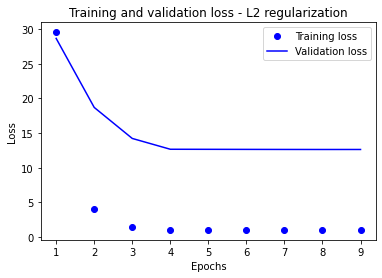

In [65]:
from tensorflow.keras import regularizers

hidden = 3

mode_l2 = Sequential()
mode_l2.add(layers.Dense(hidden, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(500,)))
mode_l2.add(layers.Dense(hidden, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
mode_l2.add(layers.Dense(3, activation='softmax'))


mode_l2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=[SparseCategoricalAccuracy()])  # Métrica alterada

mode_l2.summary()

history_l2 = mode_l2.fit(x_train, y_train_encoded, epochs=9, batch_size=32, validation_split=0.2)

# Avaliar o modelo
results_l2 = mode_l2.evaluate(x_test, y_test_encoded, verbose = 0)
print(results_l2)

# Plotar a curva de aprendizado
loss_values_l2 = history_l2.history['loss']
val_loss_values_l2 = history_l2.history['val_loss']
epochs_l2 = range(1, len(loss_values_l2) + 1)

plt.plot(epochs_l2, loss_values_l2, 'bo', label='Training loss')
plt.plot(epochs_l2, val_loss_values_l2, 'b', label='Validation loss')
plt.title('Training and validation loss - L2 regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_150 (Dense)           (None, 3)                 1503      
                                                                 
 dropout_12 (Dropout)        (None, 3)                 0         
                                                                 
 dense_151 (Dense)           (None, 3)                 12        
                                                                 
 dropout_13 (Dropout)        (None, 3)                 0         
                                                                 
 dense_152 (Dense)           (None, 3)                 12        
                                                                 
Total params: 1,527
Trainable params: 1,527
Non-trainable params: 0
_________________________________________________________________
Epoch 1/9
19/19 [==============================] - 

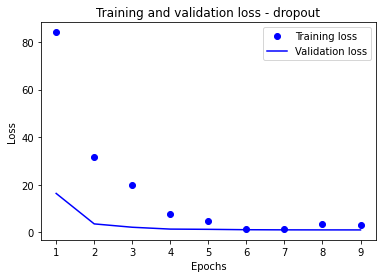

In [71]:
from tensorflow.keras import regularizers

hidden = 3

mode_dr = Sequential()
mode_dr.add(layers.Dense(hidden, activation='relu', input_shape=(500,)))
mode_dr.add(layers.Dropout(0.5))
mode_dr.add(layers.Dense(hidden, activation='relu'))
mode_dr.add(layers.Dropout(0.5))
mode_dr.add(layers.Dense(3, activation='softmax'))


mode_dr.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=[SparseCategoricalAccuracy()])  # Métrica alterada

mode_dr.summary()

history_dr = mode_dr.fit(x_train, y_train_encoded, epochs=9, batch_size=32, validation_split=0.2)

# Avaliar o modelo
results_dr = mode_dr.evaluate(x_test, y_test_encoded, verbose = 0)
print(results_dr)

# Plotar a curva de aprendizado
loss_values_dr = history_dr.history['loss']
val_loss_values_dr = history_dr.history['val_loss']
epochs_dr = range(1, len(loss_values_dr) + 1)

plt.plot(epochs_dr, loss_values_dr, 'bo', label='Training loss')
plt.plot(epochs_dr, val_loss_values_dr, 'b', label='Validation loss')
plt.title('Training and validation loss - dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()